# Color Conversion

In [9]:
import cv2
import numpy as np

In [10]:
import matplotlib.pyplot as plt

In [11]:
img = cv2.imread("opencv-course\Resources\Photos\group 2.jpg")

In [12]:
cv2.imshow("image",img)
cv2.waitKey(0) 
cv2.destroyAllWindows()

In [13]:
# BGR to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
cv2.imshow("Gray", gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

(828, 640)


In [14]:
# BGR to RGB conversion
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.imshow("RGB", rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [15]:
# BGR to HSV conversion
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV", hsv)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [16]:
# BGR to L*a*b conversion
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
cv2.imshow("L*a*b", lab)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [17]:
# Grayscale to BGR conversion?
bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
print(bgr.shape)
cv2.imshow("BGR", bgr)
cv2.waitKey(0)
cv2.destroyAllWindows()

(828, 640, 3)


# Color channel Split/Merge


In [18]:
b,g,r = cv2.split(img)

In [19]:
cv2.imshow("Normal",img)
cv2.imshow("Blue",b)
cv2.imshow("Green",g)
cv2.imshow("Red",r)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
print(img.shape)
print(b.shape)
print(r.shape)
print(g.shape)

(828, 640, 3)
(828, 640)
(828, 640)
(828, 640)


In [21]:
merged = cv2.merge([b,g,r])
cv2.imshow("Merged", merged)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
blank = np.zeros(img.shape[:2], dtype='uint8')

In [23]:
blue = cv2.merge([b,blank,blank])
green = cv2.merge([blank,g,blank])
red = cv2.merge([blank,blank,r])
cv2.imshow("Blue",blue)
cv2.imshow("Green",green)
cv2.imshow("Red",red)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Histogram 

In [58]:
img = cv2.imread("opencv-course\Resources\Photos\cats.jpg")

In [59]:
cv2.imshow("Lady",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [60]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Lady",gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [61]:
# GrayScale Histogram
gray_hist = cv2.calcHist([gray], [0], None, [256], [0,256])

(0.0, 256.0)

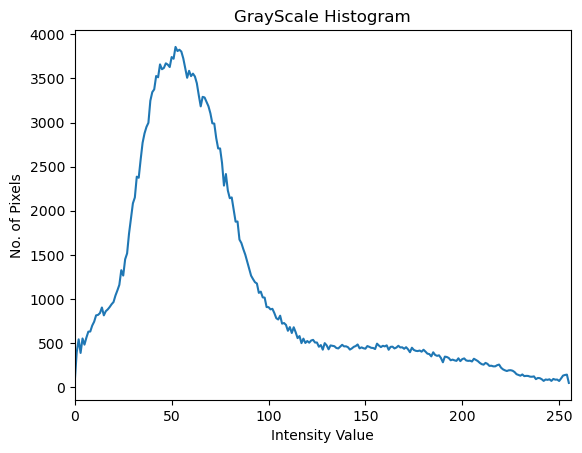

In [62]:
plt.figure()
plt.title("GrayScale Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("No. of Pixels")
plt.plot(gray_hist)
plt.xlim(0,256)


In [65]:
blank = np.zeros(img.shape[:2], dtype="uint8")
mask = cv2.circle(blank.copy(), center=(img.shape[1]//2, img.shape[0]//2 ), radius=100, color=255 , thickness=-1)
masked = cv2.bitwise_and(gray, gray, mask= mask)
cv2.imshow("Masked Image", masked)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [66]:
# Masked Histogram
mask_hist = cv2.calcHist([gray], [0], mask, [256], [0,256])

(0.0, 256.0)

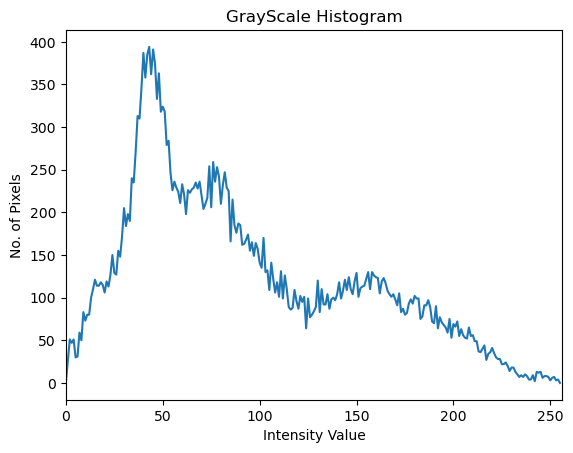

In [67]:
plt.figure()
plt.title("GrayScale Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("No. of Pixels")
plt.plot(mask_hist)
plt.xlim(0,256)

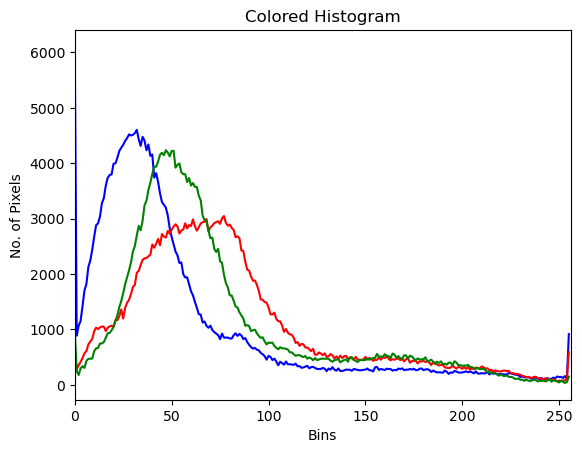

In [68]:
# Color Histogram
colors = {'b', 'g', 'r'}
plt.figure()
plt.title("Colored Histogram")
plt.xlabel("Bins")
plt.ylabel("No. of Pixels")
for i,col in enumerate(colors):
    hist = cv2.calcHist([img], [i], None, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.show()

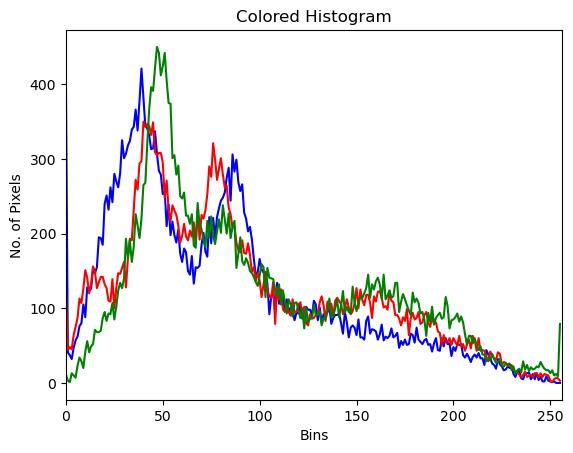

In [69]:
plt.figure()
plt.title("Colored Histogram")
plt.xlabel("Bins")
plt.ylabel("No. of Pixels")
for i,col in enumerate(colors):
    hist = cv2.calcHist([img], [i], mask, [256], [0,256])
    plt.plot(hist, color=col)
    plt.xlim([0,256])
plt.show()